In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from inspect import signature
from pprint import pprint as pp

from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [2]:
import warnings
warnings.filterwarnings(action = 'ignore')

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size = 9)
plt.rc('font', family = 'NanumBarunGothic')
mpl.font_manager._rebuild()

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [3]:
df_search1 = pd.read_csv('../Project_data/data/Search1.csv')
df_segs = pd.read_csv('../Project_data/data/segs.csv')
df_search1.head()

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6
1,5607714,4090791,프리메라 마스크팩,3
2,5607714,4090791,여성청결제,1
3,5612428,1876482,명품가방,1
4,5612428,658123,콩순이 아이스크림,1


In [4]:
df_segs.head()

,CLNT_ID,PD_BUY_TOT,BUY_COUNT,CUS_SEG
0,4540824,2062130,79,2
1,5091280,18639400,378,2
2,225269,4100,3,3
3,241426,37300,3,3
4,1063284,186600,7,2


In [5]:
df_search = pd.merge(left = df_segs, right = df_search1, how = 'inner', on = 'CLNT_ID')
df_search.head()

,CLNT_ID,PD_BUY_TOT,BUY_COUNT,CUS_SEG,SESS_ID,KWD_NM,SEARCH_CNT
0,4540824,2062130,79,2,6023151,올리비안로렌 원피스,1
1,4540824,2062130,79,2,9167474,휠라슬립온,1
2,4540824,2062130,79,2,6182723,올리비안로렌,1
3,4540824,2062130,79,2,6078328,올리비안로렌,1
4,4540824,2062130,79,2,6078328,앤섬원피스,1


In [30]:
list_kwd = df_search.KWD_NM[:]

In [31]:
list_kwd = list_kwd.tolist()

In [32]:
list_kwd

['올리비안로렌 원피스',
 '휠라슬립온',
 '올리비안로렌',
 '올리비안로렌',
 '앤섬원피스',
 '슈페리어남성',
 '생수',
 '여성 통바지',
 '헤드 슬립온',
 '비온데코',
 '여성샌들',
 '로베르타 디 카메리노',
 '글루건',
 '베게커버',
 '소보제화 샌들',
 '로베르타 디 카메리노 남성',
 '남성여름바지',
 '올리비아하슬러',
 '여름바지 여성',
 '노와이어브레지어',
 '원피스',
 '솔로이스트 원피스',
 'k2남성',
 '카라 원피스',
 '올리비아하슬러',
 '레노마남성바지',
 '통바지 여성',
 '부츠컷 슬랙스',
 '생수',
 '로베르타 디 카메리노',
 '아쿠아슈즈 여성',
 '나이키 야구모자',
 '남성여름골프바지',
 '솔로이스트 원피스',
 '이자녹스',
 '참존',
 '남성셔츠',
 '아이스크림',
 '남성등산모자',
 '에코백',
 '뉴발란스 슬리퍼',
 '앤섬',
 '원피스',
 '참존기초',
 '고세여성샌들',
 '리본블라우스',
 '여성슬립온',
 '생수',
 '여성 부츠컷',
 '남성셔츠남방',
 'k2 남성 티셔츠',
 '여성 등산바지',
 '부츠컷 슬랙스',
 '올리비아하슬러',
 '야구모자',
 '남성 티셔츠',
 '샤트렌 원피스',
 '올리비안로렌 원피스',
 '남성샌달',
 '패션풀',
 '샤트렌 원피스',
 '올리비아로렌 원피스',
 '여름 스니커즈',
 '망사 슬립온',
 '데드라',
 '올리비안로렌',
 '롯데시네마',
 '롯데시네마',
 '올삭스',
 '무료배송',
 '빈',
 '스톤헨지반지',
 '펀칭블라우스',
 '주니어반바지',
 '지미추',
 '주니어청반바지',
 '탑텐',
 '14K 귀걸이',
 '블루독반바지',
 '헬렌스타인 베개',
 '아동반바지',
 '판도라 반지',
 '아디다스키즈',
 '스톤헨지',
 '귀걸이 뒷마개',
 '린넨셔츠',
 '블루독',
 '나이키키즈반바지',
 '아디다스키즈반바지',
 '박민영귀걸이',
 '아디다스키즈티셔츠',
 '판도라반지',
 '

In [47]:
kwd_count = Counter(list_kwd)
dict_keyword = dict(kwd_count.most_common())

In [48]:
dict_keyword

{'원피스': 7459,
 '생수': 6091,
 '뉴발란스키즈': 5057,
 '티셔츠': 5054,
 '에고이스트': 4933,
 '지오다노': 4774,
 '크록스': 4738,
 '여성샌들': 4616,
 '나스': 4582,
 '아디다스키즈': 4486,
 '입생로랑': 4437,
 '정관장': 4300,
 '타미힐피거여성': 4282,
 '블루독': 4267,
 '설화수': 4253,
 '빈폴레이디스': 4222,
 '아디다스': 4199,
 '블라우스': 4174,
 '에이치커넥트': 4000,
 '나이키': 3951,
 '무료배송': 3794,
 '노스페이스키즈': 3618,
 '나이키운동화': 3589,
 '맥': 3499,
 '헤지스레이디스': 3474,
 '남성': 3399,
 '여성': 3323,
 '키엘': 3274,
 '써스데이아일랜드': 3169,
 '에스티로더': 3100,
 '헤라': 3068,
 '난닝구': 3004,
 '아쿠아슈즈': 2990,
 '물티슈': 2950,
 '바비브라운': 2848,
 '랑콤': 2838,
 '플라스틱아일랜드': 2819,
 '슬리퍼': 2814,
 '샤넬': 2753,
 '빈폴키즈': 2707,
 '레노마키즈': 2671,
 '베네피트': 2621,
 '빌리프': 2599,
 '슈에무라': 2532,
 '조르지오아르마니': 2523,
 '양말': 2522,
 '라코스테': 2512,
 '블루독베이비': 2507,
 '샌들': 2494,
 '블랙야크키즈': 2484,
 '올리브데올리브': 2451,
 '메이크업포에버': 2442,
 '크리니크': 2419,
 '양산': 2367,
 '타미힐피거남성': 2347,
 '래핑차일드': 2346,
 '쥬시쥬디': 2322,
 '롱원피스': 2315,
 '비오템': 2293,
 '디올': 2272,
 '헤지스남성': 2251,
 '디스커버리': 2243,
 '탑텐': 2239,
 '정관장 에브리타임': 2234,
 '닥스키즈': 2233,
 '핏플랍': 2

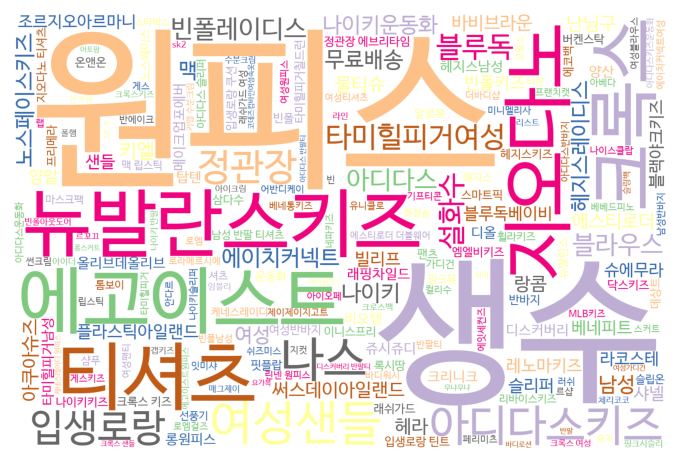

In [71]:
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
                      background_color='white',colormap = "Accent_r", 
                      width=1500, height=1000).generate_from_frequencies(dict_keyword) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()
